In [17]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = [] # used only for reporting
        
        # calculate and print the number of initial errors #LS
        initial_errors = 0
        for xi, target in zip(X, y):
            if self.predict(xi) != target:
                initial_errors += 1
        print("initial errors: ", initial_errors)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self
    
    # In following 2 fns, changed variable arg name from X to x,
    # since X is a 2d array above, and a 1d array here. 
    # Using X works, but I think it's confusing. #LS
    
    # The dot product (np.dot) of two 1d arrays is what you get 
    # from multiplying corresponding values and adding up the results.

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, 0)

In [28]:
#Data is from the 2022 NBA season and it directly downloaded from the basketball-reference.com website. I have only used the first 20 rows of the data for this example.

#Predicts if someone got an award based on their assist to turnover ratio.

import pandas as pd

df = pd.read_csv('NBA2022.csv')

df['assist-turnover-ratio'] = df['AST']/df['TOV']

df['isAward'] = df['Awards'].notna().astype(int)

df_per_game_final = df[['assist-turnover-ratio', 'FG', 'isAward']]

print(df_per_game_final)


    assist-turnover-ratio    FG  isAward
0                1.235294  11.0        1
1                2.222222  10.9        1
2                2.212121   9.6        1
3                1.964286  10.4        1
4                1.461538  11.2        1
5                1.586207   9.8        1
6                1.968750  10.0        1
7                1.515152  10.3        1
8                1.514286  10.5        0
9                1.400000   9.1        0
10               2.125000  11.1        1
11               1.692308  10.0        1
12               2.037037   9.9        0
13               2.619048   9.9        1
14               2.304348  10.0        0
15               3.157895   9.8        0
16               1.206897  10.1        1
17               2.382353   9.3        1
18               2.487805   8.2        0
19               1.352941   9.8        1


[[1.23529412 1.        ]
 [2.22222222 1.        ]
 [2.21212121 1.        ]
 [1.96428571 1.        ]
 [1.46153846 1.        ]
 [1.5862069  1.        ]
 [1.96875    1.        ]
 [1.51515152 1.        ]
 [1.51428571 0.        ]
 [1.4        0.        ]
 [2.125      1.        ]
 [1.69230769 1.        ]
 [2.03703704 0.        ]
 [2.61904762 1.        ]
 [2.30434783 0.        ]
 [3.15789474 0.        ]
 [1.20689655 1.        ]
 [2.38235294 1.        ]
 [2.48780488 0.        ]
 [1.35294118 1.        ]]
initial errors:  6
xi:  [1.23529412 1.        ] Target:  1 Prediction:  1
xi:  [2.22222222 1.        ] Target:  1 Prediction:  1
xi:  [2.21212121 1.        ] Target:  1 Prediction:  1
xi:  [1.96428571 1.        ] Target:  1 Prediction:  1
xi:  [1.46153846 1.        ] Target:  1 Prediction:  1
xi:  [1.5862069 1.       ] Target:  1 Prediction:  1
xi:  [1.96875 1.     ] Target:  1 Prediction:  1
xi:  [1.51515152 1.        ] Target:  1 Prediction:  1
xi:  [1.51428571 0.        ] Target:  0 Predicti

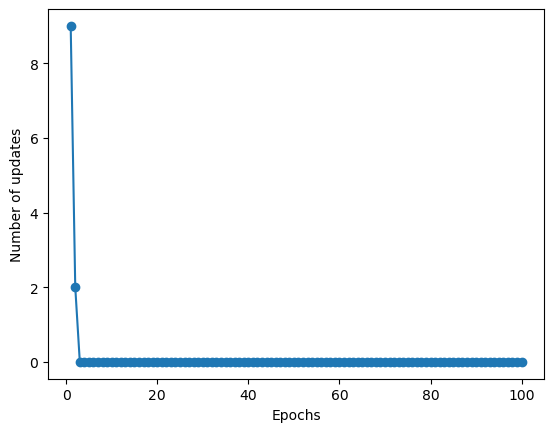

In [38]:
import matplotlib.pyplot as plt

y = df_per_game_final.iloc[0:20, 2].values
X = df_per_game_final.iloc[0:20, [0,2]].values

print(X)
basketball_perceptron = Perceptron(0.01, 100)

basketball_perceptron.fit(X, y)

plt.plot(range(1, len(basketball_perceptron.errors_) + 1), basketball_perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()